CoroNet: COVID19 Chest XRays classification model 
By Dr Asif Iqbal Khan


The model uses Xception/InceptionResNetV2/NasNet as base model pre-trained on ImageNet, retrained on Chest X-rays dataset 





Mount Google Drive to load models containing X-ray images in personal folder

In [ ]:
# Mount Google Drive by importing drive from google colab
# Get the authorization code for connecting to user's drive to mount

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Copy dataset folder from Google Drive

!cp -R /content/drive/"My Drive"/DATASET/covid-19 /content


In [ ]:
#import libraries and packages

from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

from tensorflow.keras import optimizers




In [ ]:
print(os.listdir("/content/"))

#Print and remove zips once done



['.config', 'covid-19', 'drive', 'sample_data']


In [ ]:
ls covid-19/four_classes/train

covid/  normal/  pneumonia_bacterial/  pneumonia_viral/


**Crete Data Generators to preprocess and prepare training and validation**

In [ ]:

from os import listdir
#data_list = listdir('/content/covid-19/four_classes/train')
data_list = listdir('/content/drive/My Drive/DATASET/covid-19/four_classes/train')

#Delete some classes that may interfere

print(len(data_list))


DATASET_PATH  = '/content/drive/My Drive/DATASET/covid-19/four_classes/train'
test_dir =  '/content/drive/My Drive/DATASET/covid-19/four_classes/test'
IMAGE_SIZE    = (128, 128)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.00001



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')



# For multiclass use categorical n for binary use binary
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"   #For multiclass use categorical n for binary use binary
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"  #For multiclass use categorical n for binary use binary
                                                 
                                                  )



4
Found 1489 images belonging to 4 classes.
Found 370 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
path="/content/covid-19/four_classes/"
!ls -a /content/covid-19/four_classes/train/.ipynb_checkpoints
!rm -R /content/covid-19/four_classes/test/.ipynb_checkpoints 
!pwd

ls: cannot access '/content/covid-19/four_classes/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/covid-19/four_classes/test/.ipynb_checkpoints': No such file or directory
/content


Create a new model or Use Pre trained CNN Model and modify according to the need. 

In [ ]:
#Simple CNN model based on Xception. Set dense layer neuron count same as the no. of output classes 
#If you wnna use a saved model then skip this step


from tensorflow.keras.applications import ResNet50

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))


conv_base.trainable = True


model = models.Sequential()
model.add(conv_base)




model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


model.compile(loss='categorical_crossentropy',     #for multiclass use categorical_crossentropy
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

94773248/94765736 [==============================] - 1s 0us/step


**Load an already saved model (If there is a trained model already saved on drive)**

In [ ]:
#Load saved model from .hs file, otherwise disable this line
#model=load_model('/content/drive/My Drive/Colab Notebooks/4-class-Covid19-Mod-Xception.h5')
print(model.summary())
print(conv_base.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 40,367,492
Trainable params: 40,314,372
Non-trainable params: 53,120
_________________________________________________________________
None
Model: "resnet50"
__________________________________________________________________________________

Training

In [10]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )



47
12
Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
46/46 [==============================] - 45s 983ms/step - loss: 1.9933 - acc: 0.4125 - val_loss: 1.7413 - val_acc: 0.1562
Epoch 2/100
46/46 [==============================] - 44s 956ms/step - loss: 1.5336 - acc: 0.5045 - val_loss: 1.6656 - val_acc: 0.1676
Epoch 3/100
46/46 [==============================] - 44s 955ms/step - loss: 1.1608 - acc: 0.5889 - val_loss: 2.3318 - val_acc: 0.1619
Epoch 4/100
46/46 [==============================] - 44s 953ms/step - loss: 1.1113 - acc: 0.6198 - val_loss: 2.4245 - val_acc: 0.1705
Epoch 5/100
46/46 [==============================] - 44s 965ms/step - loss: 0.9369 - acc: 0.6754 - val_loss: 2.9539 - val_acc: 0.1648
Epoch 6/100
46/46 [==============================] - 44s 948ms/step - loss: 0.8478 - acc: 0.6946 - val_loss: 2.3236 - val_acc: 0.1761
Epoch 7/100
46/46 [==============================] - 44s 955ms/step - loss: 0.8077 - acc: 0.7049 - val_loss: 2.6924 - val_acc: 0.1903
Epoch 8/100
46/46 [==============================] - 44s 946ms

Evaluation

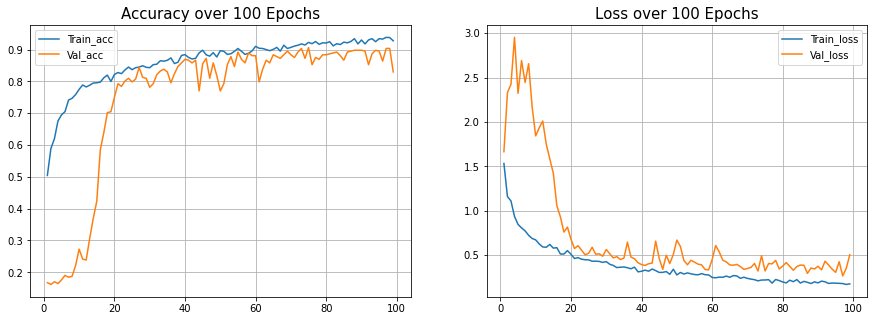

In [11]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 100)

In [12]:
#Save the trained model and copy to drive

model.save('4-class-Covid19-Mod-Xception.h5')
#!cp /content/"4-class-Covid19-Mod-Xception.h5" /content/drive/"My Drive"/"Colab Notebooks"


**Evaluate using evaluate Generator**

In [13]:
# Create evaluate data generator from test set
#Dont forget shuffle false

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/My Drive/DATASET/covid-19/four_classes/test'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1, 
                                                  shuffle=False, seed=42, class_mode="categorical")
eval_generator.reset()    


Found 280 images belonging to 4 classes.


In [14]:
#Evalute the trained model on evaluate generator
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)), 
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

#Poor test accuracy due to the small dataset size

Instructions for updating:
Please use Model.evaluate, which supports generators.
280/280 [==============================] - 7s 25ms/step - loss: 0.5069 - acc: 0.8071
Test loss: 0.5068517327308655
Test accuracy: 0.8071428537368774


**Create DataGen on single folder/class and predict !**

In [15]:
IMAGE_SIZE    = (128, 128)
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/My Drive/DATASET/covid-19/four_classes/test'
pred_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        
        seed=42,
        
        class_mode="categorical")
pred_generator.reset()   

count=[0,0,0,0]

files=pred_generator.filenames

for i in range(len(files)):
  x,y = pred_generator.next()
  img = x
  predict=model.predict(img)
  
  p=np.argmax(predict, axis=-1)
  print(str(p[0])+" "+files[pred_generator.batch_index-1])
  #print(predict)
  #p=model.predict_classes(img)
  count[p[0]]+=1
  
#print(str(p[0])+" "+files[i]) 
print(count)
  


Found 280 images belonging to 4 classes.
0 covid/RX-torace-a-letto-del-paziente-in-unica-proiezione-AP-1-1.jpeg
0 covid/S1-new.png
0 covid/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
1 covid/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg
0 covid/X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg
0 covid/radiol.2020201160.fig3b.jpeg
0 covid/radiol.2020201160.fig3c.jpeg
0 covid/radiol.2020201160.fig3d.jpeg
0 covid/radiol.2020201160.fig6b.jp

### **`Predict Results using predict generator and evaluate the accuracy and Confusion matrix `**

Instructions for updating:
Please use Model.predict, which supports generators.
[[33  1  0  1]
 [ 0 98  0  2]
 [ 1  5 39 30]
 [ 2  4  8 56]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.91      0.98      0.94       100
           2       0.83      0.52      0.64        75
           3       0.63      0.80      0.70        70

    accuracy                           0.81       280
   macro avg       0.82      0.81      0.80       280
weighted avg       0.82      0.81      0.80       280



findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


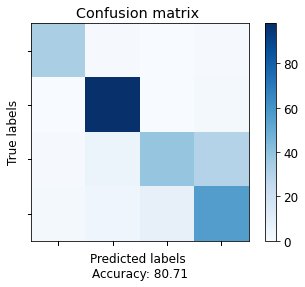

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()  
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["covid","normal","pneumonia_bac","pneumonia_vir"]
#print(confusion_matrix(classes,predict))

font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100))
plt.ylabel("True labels")
plt.xticks(classes, [])
plt.yticks(classes, [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()